# Introduction
Every year, a huge number of race sports are recorded; yet, many people are uninterested in how sports are timed, despite the fact that this is vital to some organizations. This is the exact purpose of Huber Timing, a company that times races using modern disposable chips and uploads the results to the company's website. There is no telling what a data scientist might accomplish or come across, and common questions for companies who would wish to use this data are;

## Question
- What is the average run time difference between men and women?
- What is the gender split in the racing sports?
- Who has the greater performance in the sport between the two genders?

## Objective
The goal of this project is to scrape the web for relevant data and develop useful insights from the data on racing sport that can be used to generate fundamental decisions about teams or players and might be published in newspapers for the general public.


### Dataset Description
 The dataset will be scraped from [hubertiming]('https://www.hubertiming.com/') site

In [93]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

### Accessing the webpage

In [94]:
url = 'https://www.hubertiming.com/results/2018mlk' 
html=urlopen(url)# requesting a connection 
# page = request.get(url)

the code above is quite intuitive the link is stored in a variable called url actually this is gotten from the library imported above, and then html enables python to open the url

In [95]:
#Creating the object called Soup
Soup = BeautifulSoup(html, "lxml")

#viewing the title of the website
title = Soup.title 
print(title)# viewing the title of the website
print(title.text)# extracts the text (title of the webpage)

<title>Race results for the 2018 MLK Dream Run!</title>
Race results for the 2018 MLK Dream Run!


In [96]:
# Lets view all the links in the website
links = Soup.find_all('a')
print(links)

[<a href="https://www.mlkdreamrun.com/" target="_blank">MLK Dream Run</a>, <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>, <a href="https://www.hubertiming.com">Huber Timing Home</a>, <a class="btn btn-primary btn-lg" href="/results/2018MLK10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 10K</a>, <a class="btn btn-primary btn-lg" href="/results/2018MLK15K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 15K</a>, <a class="btn btn-primary btn-lg" href="/results/summary/2018MLK" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>, <a id="individual" name="individual"></a>, <a data-url="/results/2018MLK" href="#tabs-1" id="rootTab" style="font-size: 18px">5K Results</a>, <a href="https://www.hubertiming.com/"><img height="65" src="https://www.hubertiming.com//sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber T

In [97]:
#fine tuining the search 

links = Soup.find_all('a', href = True)
for link in links:
    print(link['href'])# this will enable us to see the search in as an array 

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


this can be usefully because it prints the links directly and maybe you might want to access a particular link and viola, there you have it.

In [98]:
#veiwing all data from the webpage
all_rows = Soup.find_all('tr')# Here i am trying to see the entire rows of the data available
print(all_rows)

[<tr colspan="2">
<b>5K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>191</td>
</tr>, <tr>
<td>Male:</td>
<td>78</td>
</tr>, <tr>
<td>Female:</td>
<td>113</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Pace</th>
<th>Chip Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr data-bib="1191">
<td>1</td>
<td>1191</td>
<td>

                    MAX RANDOLPH

                </td>
<td>M</td>
<td>29</td>
<td>WASHINGTON</td>
<td>DC</td>
<td>5:25</td>
<td>16:48</td>
<td>

                    1 of 78

                </td>
<td>M 21-39</td>
<td>

                    1 of 33

                </td>
<td>0:08</td>
<td>16:56</td>
</tr>, <tr data-bib="1080">
<td>2</td>
<td>1080</td>
<td>

                    NEED NAME KAISER RUNNER

                </td>
<td>M</td>
<td>25</td>
<td>PORTLAND</td>
<td>OR</td>
<td>5:39</td>
<td>17:31</td>
<td>



 Wow seems to be an unending list but lets just a few rows 

In [130]:
# filtering through the webpage and creating a data variable

data = []# global variable 
all_rows = Soup.find_all('tr') # looking for all table rows in the webpage 
for row in all_rows:
    row_list = row.find_all('td') # also looking for the table data and storing it in a variable this will be our data
    dataRow = []

    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
    

    
# trying to see just a minimized version of the data cause i expect to see alot 
data = data[1:] 
print(data[-2:])



[['190', '2087', '\r\n\r\n                    LEESHA POSEY\r\n\r\n                ', 'F', '43', 'PORTLAND', 'OR', '30:17', '1:33:53', '\r\n\r\n                    112 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    36 of 37\r\n\r\n                ', '0:00', '1:33:53'], ['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


-Observation
so it appears this data is very dirty with alot of inconsistencies like for instance there are entries such as **\r\n\r\n**, but lets see it in a pandas dataframe because this is an array its quite difficult to catch every detail properly because of the format.

i used 4 down **[4:]** to correct some really unnecessary features i had when i saw the data at first with the index sampling of **[1:]**

#### Loading Dataset

In [142]:
# converting the array to a dataframe for better exploration
df = pd.DataFrame(data)
print(df.head())
# print(df.tail())

           0     1                                                  2     3   \
0  Finishers:   191                                               None  None   
1       Male:    78                                               None  None   
2     Female:   113                                               None  None   
3        None  None                                               None  None   
4           1  1191  \r\n\r\n                    MAX RANDOLPH\r\n\r...     M   

     4           5     6     7      8   \
0  None        None  None  None   None   
1  None        None  None  None   None   
2  None        None  None  None   None   
3  None        None  None  None   None   
4    29  WASHINGTON    DC  5:25  16:48   

                                                  9        10  \
0                                               None     None   
1                                               None     None   
2                                               None     None   
3     

In [132]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Finishers:,191,None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,78,None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,113,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,5:25,16:48,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       194 non-null    object
 1   1       194 non-null    object
 2   2       191 non-null    object
 3   3       191 non-null    object
 4   4       191 non-null    object
 5   5       191 non-null    object
 6   6       191 non-null    object
 7   7       191 non-null    object
 8   8       191 non-null    object
 9   9       191 non-null    object
 10  10      191 non-null    object
 11  11      191 non-null    object
 12  12      191 non-null    object
 13  13      191 non-null    object
dtypes: object(14)
memory usage: 21.5+ KB


In [134]:

df.shape

(195, 14)

In [135]:
#Checking missing values
df.isnull().sum()

0     1
1     1
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
dtype: int64

In [136]:
# Summary Statistics
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,194,194,191,191,191,191,191,191,191,191,191,191,191,191
unique,194,194,190,2,55,22,6,152,170,191,9,191,45,178
top,Finishers:,191,\r\n\r\n UNKNOWN RUNNER SEE...,F,,PORTLAND,OR,9:28,41:50,\r\n\r\n 1 of 78\r\n\r\n ...,F 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:26,40:18
freq,1,1,2,113,9,130,149,4,2,1,53,1,8,2


### Cleaning

**Quality Issues $ Tidy issues**

- inconsistent column header 
- seperate the Chap Time column into seperate values for time and date 
- convert the columns with integers to either float or integers respectively 
- Remove the columns that arent needed

In [137]:
#Changing all headers to their correct form
header_list= []
col_headers = Soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Pace', 'Chip Time', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [138]:
# Testing Changes made
df.columns = header_list
# tyring to view the dataset programmatically
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.head())


        Place   Bib                                               Name Gender  \
0  Finishers:   191                                               None   None   
1       Male:    78                                               None   None   
2     Female:   113                                               None   None   
3        None  None                                               None   None   
4           1  1191  \r\n\r\n                    MAX RANDOLPH\r\n\r...      M   

    Age        City State Chip Pace Chip Time  \
0  None        None  None      None      None   
1  None        None  None      None      None   
2  None        None  None      None      None   
3  None        None  None      None      None   
4    29  WASHINGTON    DC      5:25     16:48   

                                        Gender Place Age Group  \
0                                               None      None   
1                                               None      None   
2                   

In [139]:
df1 = df.dropna(axis = 0, how = 'any')
df1.shape 

(191, 14)

In [140]:
# df1['Name'] = df1['Name'].map(lambda x: x.lstrip('\').rstrip('rn'))
# df1.head()

In [143]:
name_list = df1['Name'].tolist()
print(name_list)

['\r\n\r\n                    MAX RANDOLPH\r\n\r\n                ', '\r\n\r\n                    NEED NAME KAISER RUNNER\r\n\r\n                ', '\r\n\r\n                    DAN FRANEK\r\n\r\n                ', '\r\n\r\n                    PAUL TAYLOR\r\n\r\n                ', '\r\n\r\n                    THEO KINMAN\r\n\r\n                ', '\r\n\r\n                    MELISSA GIRGIS\r\n\r\n                ', '\r\n\r\n                    CHARLIE COGGESHALL\r\n\r\n                ', '\r\n\r\n                    UNKNOWN RUNNER SEE TIMER\r\n\r\n                ', '\r\n\r\n                    UNKNOWN RUNNER SEE TIMER\r\n\r\n                ', '\r\n\r\n                    KIMONTI WILSON\r\n\r\n                ', '\r\n\r\n                    COREY MCMANUS\r\n\r\n                ', '\r\n\r\n                    MITCHELL JOHNSON\r\n\r\n                ', '\r\n\r\n                    ALEX KABA\r\n\r\n                ', '\r\n\r\n                    ROBYN MCGILLIS\r\n\r\n                ', '\

In [144]:
# Converting Chip Time from object to datatime 
df1['Chip Time'] = pd.to_datetime(df1['Chip Time'], errors = 'coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 4 to 194
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Place            191 non-null    object        
 1   Bib              191 non-null    object        
 2   Name             191 non-null    object        
 3   Gender           191 non-null    object        
 4   Age              191 non-null    object        
 5   City             191 non-null    object        
 6   State            191 non-null    object        
 7   Chip Pace        191 non-null    object        
 8   Chip Time        46 non-null     datetime64[ns]
 9   Gender Place     191 non-null    object        
 10  Age Group        191 non-null    object        
 11  Age Group Place  191 non-null    object        
 12  Time to Start    191 non-null    object        
 13  Gun Time         191 non-null    object        
dtypes: datetime64[ns](1), object(13)
memory us

In [145]:
print(df1[['Gender', 'Chip Time']].head())

  Gender           Chip Time
4      M 2022-12-20 16:48:00
5      M 2022-12-20 17:31:00
6      M 2022-12-20 18:15:00
7      M 2022-12-20 18:31:00
8      M 2022-12-20 19:31:00


In [146]:
df1.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
4,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,5:25,2022-12-20 16:48:00,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56
5,2,1080,\r\n\r\n NEED NAME KAISER R...,M,25,PORTLAND,OR,5:39,2022-12-20 17:31:00,\r\n\r\n 2 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 33\r\n\r\n ...,0:09,17:40
6,3,1275,\r\n\r\n DAN FRANEK\r\n\r\n...,M,52,PORTLAND,OR,5:53,2022-12-20 18:15:00,\r\n\r\n 3 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 27\r\n\r\n ...,0:07,18:22
7,4,1223,\r\n\r\n PAUL TAYLOR\r\n\r\...,M,54,PORTLAND,OR,5:58,2022-12-20 18:31:00,\r\n\r\n 4 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 27\r\n\r\n ...,0:07,18:38
8,5,1245,\r\n\r\n THEO KINMAN\r\n\r\...,M,22,,,6:17,2022-12-20 19:31:00,\r\n\r\n 5 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 3 of 33\r\n\r\n ...,0:09,19:40


In [147]:
df1.drop(['Bib', 'Time to Start', 'Gun Time', 'Age Group Place'], axis = 1, inplace = True) 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 4 to 194
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Place         191 non-null    object        
 1   Name          191 non-null    object        
 2   Gender        191 non-null    object        
 3   Age           191 non-null    object        
 4   City          191 non-null    object        
 5   State         191 non-null    object        
 6   Chip Pace     191 non-null    object        
 7   Chip Time     46 non-null     datetime64[ns]
 8   Gender Place  191 non-null    object        
 9   Age Group     191 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 16.4+ KB


In [152]:
# dropping null values
df1['Chip Time'].dropna(how = 'any', inplace = True)


In [ ]:


# df1['Chip Time'] = df1['Chip Time']

# for d in df['Chip Time']:
#     df1['date'] = d.date()
#     df1['time'] = d.time()
# print(df1['Chip Time'])

In [91]:
df2 = df1.copy()

df2['Chip Pace'] = pd.


df1['Chip Pace'] = pd.to_numeric(df1['Chip Pace'])
df1

C:\Users\DELL\AppData\Local\Temp\ipykernel_10900\1614121559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Chip Pace'] = pd.to_numeric(df1['Chip Pace'])


,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
1,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,NaN,2022-12-20 16:48:00,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56
2,2,1080,\r\n\r\n NEED NAME KAISER R...,M,25,PORTLAND,OR,NaN,2022-12-20 17:31:00,\r\n\r\n 2 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 33\r\n\r\n ...,0:09,17:40
3,3,1275,\r\n\r\n DAN FRANEK\r\n\r\n...,M,52,PORTLAND,OR,NaN,2022-12-20 18:15:00,\r\n\r\n 3 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 27\r\n\r\n ...,0:07,18:22
4,4,1223,\r\n\r\n PAUL TAYLOR\r\n\r\...,M,54,PORTLAND,OR,NaN,2022-12-20 18:31:00,\r\n\r\n 4 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 27\r\n\r\n ...,0:07,18:38
5,5,1245,\r\n\r\n THEO KINMAN\r\n\r\...,M,22,,,NaN,2022-12-20 19:31:00,\r\n\r\n 5 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 3 of 33\r\n\r\n ...,0:09,19:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,187,1254,\r\n\r\n CYNTHIA HARRIS\r\n...,F,64,PORTLAND,OR,NaN,2022-12-20 01:07:51,\r\n\r\n 110 of 113\r\n\r\n...,F 55+,\r\n\r\n 14 of 14\r\n\r\n ...,1:19,1:09:10
188,188,1085,\r\n\r\n EBONY LAWRENCE\r\n...,F,30,PORTLAND,OR,NaN,2022-12-20 01:08:12,\r\n\r\n 111 of 113\r\n\r\n...,F 21-39,\r\n\r\n 53 of 53\r\n\r\n ...,0:58,1:09:10
189,189,1170,\r\n\r\n ANTHONY WILLIAMS\r...,M,39,PORTLAND,OR,NaN,2022-12-20 01:09:11,\r\n\r\n 78 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 33 of 33\r\n\r\n ...,0:08,1:09:19
190,190,2087,\r\n\r\n LEESHA POSEY\r\n\r...,F,43,PORTLAND,OR,NaN,2022-12-20 01:33:53,\r\n\r\n 112 of 113\r\n\r\n...,F 40-54,\r\n\r\n 36 of 37\r\n\r\n ...,0:00,1:33:53


# Question 
-What is the average run time difference between men and women?

Text(0.5, 1.0, 'Comparison of average minutes run by male and female')

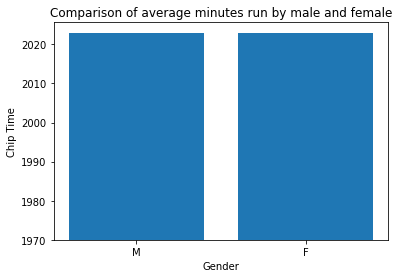

In [153]:
plt.bar(df1['Gender'], df1['Chip Time'])
plt.xlabel('Gender')
plt.ylabel('Chip Time')
plt.title('Comparison of average minutes run by male and female')

In [87]:
# Using a box plot to check the runtime of athletes 
# df1.boxplot(column = 'Chip Time', by ='Gender')
# plt.ylabel('Run time')

# Question 2
is there a relationship between Age and Chip Time

C:\Users\DELL\AppData\Local\Temp\ipykernel_10900\788277665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_i'] = round(pd.to_numeric(df1['Age'], errors = 'coerce'))


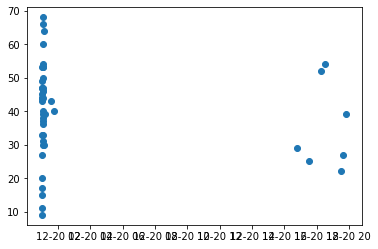

In [116]:
df1['Age_i'] = round(pd.to_numeric(df1['Age'], errors = 'coerce'))
df1.dropna(how = 'any')

plt.scatter(df1['Chip Time'], df1['Age_i'])
plt.show()

In [ ]:
df1.to_csv('race_sport')